# Assignment 2: Enhancement and Filtering
## SCC0251.2020.1 - Image Processing
### Prof. Dr. Moacir Ponti
### 10284952 - Vitor Gratiere Torres
https://github.com/vitorgt/SCC0251

In [1]:
# Imports
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
# Formulae described on assignment's pdf


def scale(image, c=0, d=255):
    a = np.min(image)
    b = np.max(image)
    return (image-a)*((d-c)/(b-a))+c


def gaussian(x, s):  # Gaussian kernel
    return np.exp((-(x**2))/(2*(s**2)))/(2*np.pi*(s**2))


def bilateralFilter(image):

    def e(x, y):  # Eclidean distance
        return np.sqrt(x**2 + y**2)

    n = int(input())
    ss = float(input())
    sr = float(input())

    # padding lenght
    pad = int(np.floor(n/2))

    # original image dimensions
    ix, iy = image.shape

    # final image
    ans = np.array([[0.0 for y in range(0, iy)] for x in range(0, ix)])

    # range to create spatial gaussian component
    # it creates ranges like [-2, -1, 0, 1, 2] for n == 5
    nrng = range(int(np.ceil(-n/2)), int(np.ceil(n/2)))

    # spatial gaussian component
    sgc = np.array([[gaussian(e(x, y), ss) for y in nrng] for x in nrng])

    # padding
    image = np.pad(image, pad, 'constant').astype(np.float)

    # for each index in image avoiding the pad
    for i in range(pad, ix+1):
        for j in range(pad, iy+1):

            # range gaussian component for each neighborhood
            # it subtracts the middle value from each valeu in the neighborhood
            # and applies it to the gaussian, and creates a new matrix, rgc
            rgc = np.array([[gaussian(image[x, y]-image[i, j], sr)
                             for y in range(j-pad, j+pad+1)]
                            for x in range(i-pad, i+pad+1)])
            w = np.multiply(rgc, sgc)
            # multiplies windowed image and w, sums each point
            # than devides by the sum of w
            ans[i-pad, j-pad] = np.sum(np.multiply(image[i-pad:i+pad+1,
                                                         j-pad:j+pad+1],
                                                   w))/np.sum(w)
    return ans


def unsharpMask(image):
    c = float(input())
    if(c > 1):
        raise ValueError("C must be <= 1")

    k = int(input())
    if(k == 1):
        k = np.array([[0, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 0]])
    elif(k == 2):
        k = np.array([[-1, -1, -1],
                      [-1, 8, -1],
                      [-1, -1, -1]])
    else:
        raise ValueError("K must be 1 or 2")

    # original image dimensions
    ix, iy = image.shape

    # final image
    ans = np.array([[0.0 for y in range(0, iy)] for x in range(0, ix)])

    # padding
    image = np.pad(image, 1, 'constant').astype(np.float)

    # for each index in image avoiding the pad
    for i in range(1, ix+1):
        for j in range(1, iy+1):
            ans[i-1, j-1] = np.sum(np.multiply(image[i-1:i+2, j-1:j+2], k))

    ans = scale(ans)
    ans = (c * ans) + image[1:-1, 1:-1]
    return scale(ans)


def vignette(image):
    row = float(input())
    col = float(input())

    # original image dimensions
    ix, iy = image.shape

    # it creates ranges like [-2, -1, 0, 1, 2] and [-1, 0, 1, 2]
    xrng = range(int(np.ceil((-ix+1)/2)), int(np.ceil((ix+1)/2)))
    yrng = range(int(np.ceil((-iy+1)/2)), int(np.ceil((iy+1)/2)))

    # creates the gaussian arrays
    cgc = np.transpose(np.vstack(np.array([gaussian(y, col) for y in yrng])))
    rgc = np.vstack(np.array([gaussian(x, row) for x in xrng]))

    # matrix product
    vig = np.matmul(rgc, cgc)

    return scale(np.multiply(image, vig))

In [3]:
# Root Squared Error function
def rse(r, m):
    return np.sqrt(np.sum((m.astype(np.float)-r.astype(np.float))**2))

In [4]:
# Inputs, following assignment's pdf requested sequence
r = imageio.imread(str(input()).rstrip()).astype(np.uint8)
m = int(input())
s = (False, True)[int(input())]

/home/ava/documents/classes/SCC0251_DIP/a02/images/camera.png
1
0


In [5]:
# Dictionary for functions
f = {1: bilateralFilter, 2: unsharpMask, 3: vignette}

# Appling 'm' transformation to original image 'r'
# Storing back on 'm'
m = f[m](r)

# Calculating RSE and printing
print("{:.4f}".format(rse(r, m)))

# Saving
if s:
    imageio.imwrite("images/output_img.png", m)

3
150
100
3426.2696


(-0.5, 149.5, 149.5, -0.5)

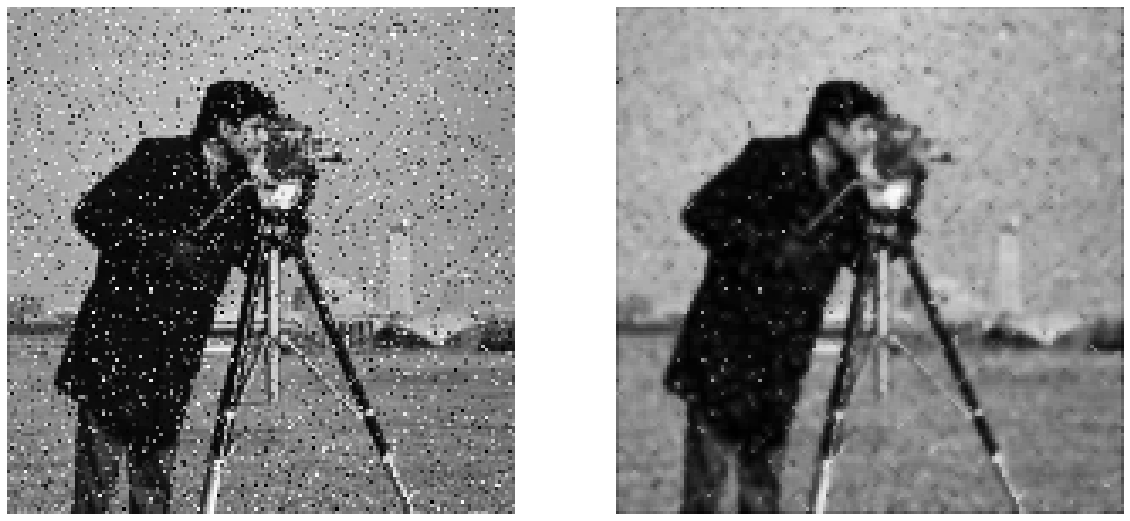

In [6]:
# Plotting
plt.figure(figsize=(20, 20))

plt.subplot(121)
plt.imshow(r, cmap="gray")
plt.axis('off')

plt.subplot(122)
plt.imshow(m.astype(np.uint8), cmap="gray")
plt.axis('off')